# Objective

Here, we'll run through our training data to gather information and try to achieve the best possible model

In [72]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import csv
import pandas as pd
import time
import sklearn.metrics as metrics

In [73]:
# Functions

def addColumnThetaZero (array):
    return np.c_[np.ones(array.shape[0]), array]

def formatArray (dataFrame, columnToExtract) :
    array = dataFrame.values
    target = array[:,columnToExtract]
    params = np.delete(array, columnToExtract, axis = 1)
    return params, target

def loadFashionTrainData():
    return pd.read_csv("fashion-mnist-dataset/fashion-mnist_train.csv")

def loadFashionTestData():
    return pd.read_csv("fashion-mnist-dataset/fashion-mnist_test.csv")

def split_train_test(data, test_ratio):
#     np.random.seed(42)
    test_set_size = int(len(data) * test_ratio)
    return data[:test_set_size], data[test_set_size:]
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def regressionLogisticCostFunction (results, model, X):
    agaTheta = model.predict_proba(X)
    print (agaTheta[:5])
    print(results[:5])
    n = X.shape[0]
    diference = results - agaTheta
    squareDiference = diference * diference
    return (np.sum(squareDiference)/(2*n))

def createTarget (target):
    results = np.zeros((target.size, 10), dtype=int)
    for i in range(0,9):
        for j in range(target.size):
            if (target[j] != i):
                results[j][i] = 0
            else:
                results[j][i] = 1
    return results


# The dataset

First and foremost, we'll open train and test data. The training data is split to obtain validation items and the the target values are also separated from the original data. Also, added a column for Bias.


In [74]:
fashionTrainDataset = loadFashionTrainData()
fashionTestDataset = loadFashionTestData()

trainSet, validationSet = split_train_test(fashionTrainDataset, 0.2)

fashionTrainParams, fashionTrainTarget = formatArray(trainSet, 0)
fashionValidationSetParams, fashionValidationSetTarget = formatArray(validationSet, 0)
fashionTestParams, fashionTestTarget = formatArray (fashionTestDataset, 0)

trainTarget = createTarget(fashionTrainTarget)
print (trainTarget[:5])
print(fashionTrainTarget[:5])


fashionTrainParams = addColumnThetaZero(fashionTrainParams)
fashionValidationSetParams = addColumnThetaZero(fashionValidationSetParams)
fashionTestParams = addColumnThetaZero(fashionTestParams)

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]
[2 9 6 0 3]


In [75]:
# print (fashionTrainParams[2:3][:])
# print (fashionTrainTarget[:5])
xToPlotMultinomial_NCG = np.array([])
yToPlotMultinomial_NCG = np.array([])

### Logistic Regression 1
- Multi-class choice: Multinomial
- Solver: Newton-CG
- Max Iteration: 10

In [64]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 10
multiClass = 'multinomial'

logisticModel = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode, penalty = penalt)

start = time.clock()
logisticModel.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction = regressionLogisticCostFunction(trainTarget, logisticModel, fashionTrainParams)
print (costFunction)

xToPlotMultinomial_NCG = np.append(xToPlotMultinomial_NCG,maxIter)
yToPlotMultinomial_NCG = np.append(yToPlotMultinomial_NCG,costFunction)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


8.209910000000036
Score : 0.8367291666666666
0.8367291666666666
(array([0.80397074, 0.9586007 , 0.71584587, 0.8614999 , 0.75569358,
       0.88664305, 0.57178789, 0.93025706, 0.93547718, 0.94809544]), array([0.7938506 , 0.97045264, 0.74009374, 0.83111649, 0.7055867 ,
       0.94576573, 0.62511457, 0.8982706 , 0.93373369, 0.91589163]), array([0.79887862, 0.96449026, 0.72776789, 0.84603549, 0.72978107,
       0.91525059, 0.59726327, 0.91398406, 0.93460462, 0.93171534]), array([4846, 4772, 4694, 4962, 5173, 4499, 4364, 4915, 4829, 4946]))
[[4.40755389e-03 1.08278897e-04 3.52336211e-01 1.22801113e-02
  3.98984360e-01 3.06243681e-08 9.08242349e-02 6.95626017e-08
  1.41059148e-01 1.63984943e-09]
 [3.31872195e-09 2.63850668e-08 1.97484645e-07 1.87694736e-08
  8.29194002e-08 9.74300514e-03 7.59356207e-07 4.97498954e-01
  1.21504544e-04 4.92635448e-01]
 [2.38927535e-04 6.19193826e-06 4.22107252e-03 8.20273598e-04
  5.54805666e-02 1.67113564e-09 9.39093483e-01 2.86718586e-17
  1.39483613e-04 2.4

# Logistic Regression 2
- Multi-class choice: Multinomial
- Solver: Newton-CG
- Max Iteration: 100

In [9]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 100
multiClass = 'multinomial'

logisticModel2 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel2.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel2.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction2 = regressionLogisticCostFunction(trainTarget, logisticModel2, fashionTrainParams)
print (costFunction2)


agaTheta = model.predict_proba(X)
print (agaTheta[:5])
print(results[:5])
n = X.shape[0]
diference = results - agaTheta
squareDiference = diference * diference
return (np.sum(squareDiference)/(2*n))



xToPlotMultinomial_NCG = np.append(xToPlotMultinomial_NCG,maxIter)
yToPlotMultinomial_NCG = np.append(yToPlotMultinomial_NCG,costFunction2)

KeyboardInterrupt: 

In [65]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 20
multiClass = 'multinomial'

logisticModel2 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel2.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel2.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction2 = regressionLogisticCostFunction(trainTarget, logisticModel2, fashionTrainParams)
print (costFunction2)



xToPlotMultinomial_NCG = np.append(xToPlotMultinomial_NCG,maxIter)
yToPlotMultinomial_NCG = np.append(yToPlotMultinomial_NCG,costFunction2)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


37.9478909999998
Score : 0.789125
0.789125
(array([0.7354232 , 0.94390395, 0.67401607, 0.78378943, 0.66915114,
       0.85455303, 0.52148397, 0.89570164, 0.89481328, 0.91900377]), array([0.73327777, 0.93557653, 0.65947581, 0.78790424, 0.65332525,
       0.90429989, 0.54252072, 0.87397204, 0.91203214, 0.88814725]), array([0.73434891, 0.93972179, 0.66666667, 0.78584145, 0.6611435 ,
       0.87872295, 0.53179438, 0.88470343, 0.90334066, 0.90331208]), array([4799, 4874, 4960, 4762, 4947, 4535, 4586, 4864, 4729, 4944]))
[[4.24272145e-08 1.71934026e-11 7.62244360e-01 7.39133086e-03
  1.56394887e-03 4.10035645e-32 2.26892792e-01 2.71479959e-32
  1.90752626e-03 4.17682079e-42]
 [8.50820904e-30 4.87925802e-26 2.07565839e-21 5.55677026e-21
  2.48790013e-24 9.84588262e-05 6.61146610e-18 7.10825223e-02
  9.65193294e-10 9.28819018e-01]
 [3.66937207e-07 2.38607112e-13 5.02129560e-04 2.30999770e-08
  3.91851473e-02 5.84886909e-33 9.60312333e-01 7.30116452e-72
  3.01372340e-12 2.29377125e-68]
 [9.9999

In [66]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 30
multiClass = 'multinomial'

logisticModel2 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel2.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel2.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction2 = regressionLogisticCostFunction(trainTarget, logisticModel2, fashionTrainParams)
print (costFunction2)

xToPlotMultinomial_NCG = np.append(xToPlotMultinomial_NCG,maxIter)
yToPlotMultinomial_NCG = np.append(yToPlotMultinomial_NCG,costFunction2)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


83.88555900000028
Score : 0.7741666666666667
0.7741666666666667
(array([0.71055381, 0.93790106, 0.66165259, 0.75663255, 0.64347826,
       0.84746822, 0.49423601, 0.8874842 , 0.88817427, 0.91460862]), array([0.70715474, 0.92620605, 0.64361596, 0.76300822, 0.63701578,
       0.89997787, 0.5100584 , 0.87078768, 0.89598158, 0.88676948]), array([0.7088502 , 0.93201687, 0.65250965, 0.75980701, 0.64023071,
       0.87293411, 0.50202257, 0.87905666, 0.89206085, 0.90047393]), array([4808, 4892, 4989, 4747, 4879, 4519, 4623, 4837, 4778, 4928]))
[[1.05225224e-017 2.63815509e-023 8.89198914e-001 1.04103649e-007
  8.28953027e-014 1.74616013e-056 1.10800982e-001 6.10902548e-055
  1.10762834e-010 3.18393571e-074]
 [1.30104392e-071 1.11340076e-054 2.80841322e-047 6.20723356e-041
  5.93960616e-062 4.41240674e-008 6.70743706e-040 4.35936844e-003
  2.14651060e-021 9.95640587e-001]
 [1.47099064e-011 7.84439206e-027 2.25433780e-005 1.93952944e-018
  7.47799616e-003 6.14261231e-062 9.92499460e-001 9.113207

In [77]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 10
multiClass = 'multinomial'


for i in range (10, 101, 10):
    maxIter = i
    logisticModel2 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    start = time.clock()
    logisticModel2.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    print("Score : "+ str(logisticModel2.score(fashionValidationSetParams, fashionValidationSetTarget)))
    print(metrics.accuracy_score(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
    print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))

    costFunction2 = regressionLogisticCostFunction(trainTarget, logisticModel2, fashionTrainParams)
    print (costFunction2)

    xToPlotMultinomial_NCG = np.append(xToPlotMultinomial_NCG,maxIter)
    yToPlotMultinomial_NCG = np.append(yToPlotMultinomial_NCG,costFunction2)
    print ("==== FINISHED =====")
    print (i)
    print ("PARTIUU")

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


9.037520000000313
Score : 0.8367291666666666
0.8367291666666666
(array([0.80397074, 0.9586007 , 0.71584587, 0.8614999 , 0.75569358,
       0.88664305, 0.57178789, 0.93025706, 0.93547718, 0.94809544]), array([0.7938506 , 0.97045264, 0.74009374, 0.83111649, 0.7055867 ,
       0.94576573, 0.62511457, 0.8982706 , 0.93373369, 0.91589163]), array([0.79887862, 0.96449026, 0.72776789, 0.84603549, 0.72978107,
       0.91525059, 0.59726327, 0.91398406, 0.93460462, 0.93171534]), array([4846, 4772, 4694, 4962, 5173, 4499, 4364, 4915, 4829, 4946]))
[[4.40755389e-03 1.08278897e-04 3.52336211e-01 1.22801113e-02
  3.98984360e-01 3.06243681e-08 9.08242349e-02 6.95626017e-08
  1.41059148e-01 1.63984943e-09]
 [3.31872195e-09 2.63850668e-08 1.97484645e-07 1.87694736e-08
  8.29194002e-08 9.74300514e-03 7.59356207e-07 4.97498954e-01
  1.21504544e-04 4.92635448e-01]
 [2.38927535e-04 6.19193826e-06 4.22107252e-03 8.20273598e-04
  5.54805666e-02 1.67113564e-09 9.39093483e-01 2.86718586e-17
  1.39483613e-04 2.4

278.63318700000036
Score : 0.7634166666666666
0.7634166666666666
(array([0.6907001 , 0.93686607, 0.64867093, 0.74639649, 0.62505176,
       0.83538237, 0.47118005, 0.88516646, 0.88506224, 0.91021348]), array([0.67380224, 0.91973176, 0.63776337, 0.74592902, 0.6294829 ,
       0.89546571, 0.49072255, 0.87031282, 0.87579552, 0.88827614]), array([0.68214654, 0.92821985, 0.64317091, 0.74616268, 0.62725951,
       0.8643812 , 0.48075278, 0.8776768 , 0.8804045 , 0.89911102]), array([4905, 4921, 4936, 4790, 4796, 4477, 4581, 4827, 4871, 4896]))
[[1.15244035e-037 1.86500807e-054 9.90021181e-001 1.88498079e-007
  7.66286073e-017 2.68217991e-097 9.97863029e-003 2.10851951e-077
  1.26242191e-019 1.41519244e-108]
 [2.33173137e-198 1.89754519e-128 5.62753479e-124 2.47169829e-099
  9.94904930e-158 3.12126034e-014 1.89572852e-098 4.51379933e-005
  3.58134649e-055 9.99954862e-001]
 [1.30989705e-024 1.09209877e-056 2.47535701e-007 9.12236951e-048
  3.08904677e-004 3.10256143e-126 9.99690848e-001 1.36093

In [70]:
for i in range (10, 101, 10):
    print (i)

10
20
30
40
50
60
70
80
90
100


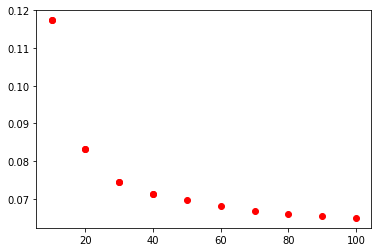

In [78]:
import matplotlib.pyplot as plt
plt.plot(xToPlotMultinomial_NCG, yToPlotMultinomial_NCG, 'ro')

In [80]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 10
multiClass = 'multinomial'


for i in range (150, 251, 50):
    maxIter = i
    logisticModel3 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    start = time.clock()
    logisticModel3.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    print("Score : "+ str(logisticModel3.score(fashionValidationSetParams, fashionValidationSetTarget)))
    print(metrics.accuracy_score(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))
    print(metrics.precision_recall_fscore_support(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))

    costFunction2 = regressionLogisticCostFunction(trainTarget, logisticModel3, fashionTrainParams)
    print (costFunction2)

    xToPlotMultinomial_NCG = np.append(xToPlotMultinomial_NCG,maxIter)
    yToPlotMultinomial_NCG = np.append(yToPlotMultinomial_NCG,costFunction2)
    print ("==== FINISHED =====")
    print (i)
    print ("PARTIUU")

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


702.2434599999997
Score : 0.7601458333333333
0.7601458333333333
(array([0.68735632, 0.93438212, 0.6443437 , 0.74785878, 0.61635611,
       0.83559075, 0.46510166, 0.88305942, 0.87946058, 0.90853914]), array([0.66808856, 0.91692058, 0.62690457, 0.74273859, 0.62752951,
       0.89488953, 0.48640947, 0.86968251, 0.87168415, 0.89009637]), array([0.6775855 , 0.925569  , 0.63550452, 0.74528989, 0.62189263,
       0.86422414, 0.47551698, 0.87631992, 0.8755551 , 0.8992232 ]), array([4923, 4923, 4988, 4820, 4744, 4481, 4562, 4819, 4863, 4877]))
[[5.26098522e-057 2.88538297e-074 9.99788039e-001 2.11911628e-004
  1.77613266e-008 1.85848370e-138 3.19808612e-008 9.58846527e-098
  1.52446418e-020 1.74744338e-138]
 [3.01226042e-315 4.81517824e-191 2.23297516e-199 3.25619484e-148
  1.03073425e-232 2.33145611e-017 2.54145412e-153 8.15342577e-005
  1.54063459e-091 9.99918466e-001]
 [9.17354959e-040 5.68551913e-083 1.65900483e-008 4.65503020e-076
  5.61739702e-005 5.57196710e-192 9.99943809e-001 2.730252

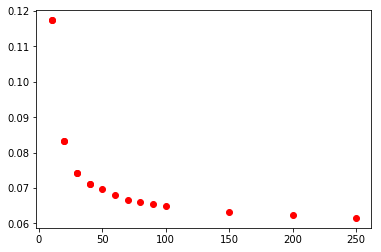

In [81]:

plt.plot(xToPlotMultinomial_NCG, yToPlotMultinomial_NCG, 'ro')

# Logistic Regression 3
- Multi-class choice: Multinomial
- Solver: Newton-CG
- Max Iteration: 500

In [16]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 500
multiClass = 'multinomial'

logisticModel3 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel3.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel3.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction3 = regressionLogisticCostFunction(trainTarget, logisticModel3, fashionTrainParams)
print (costFunction3)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


10228.087957999998
Score : 0.831
0.831
(array([0.80357143, 0.9548552 , 0.75      , 0.85185185, 0.75864979,
       0.90184049, 0.56637168, 0.91584967, 0.90078329, 0.9214876 ]), array([0.78014184, 0.92263374, 0.7569386 , 0.82591725, 0.73447712,
       0.90660793, 0.63082437, 0.90330379, 0.91189427, 0.93305439]), array([0.79168333, 0.93846798, 0.75345333, 0.83868411, 0.74636779,
       0.90421793, 0.59686308, 0.90953347, 0.90630473, 0.92723493]), array([1269, 1215, 1189, 1281, 1224, 1135, 1116, 1241, 1135, 1195]))
0.9124753200224804


# Logistic Regression 4
- Multi-class choice: Multinomial
- Solver: SAG
- Max Iteration: 10

In [18]:
penalt = 'l2'
solverMode = 'sag'
maxIter = 10
multiClass = 'multinomial'

logisticModel4 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel4.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel4.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel4.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel4.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction4 = regressionLogisticCostFunction(trainTarget, logisticModel4, fashionTrainParams)
print (costFunction4)

16.864325999998982
Score : 0.8505833333333334
0.8505833333333334
(array([0.81006494, 0.95826235, 0.75333333, 0.88244767, 0.77130802,
       0.89921122, 0.59372486, 0.94771242, 0.95300261, 0.95123967]), array([0.81336593, 0.96566524, 0.77463582, 0.83984674, 0.72367379,
       0.94388224, 0.64736842, 0.91772152, 0.94315245, 0.94266994]), array([0.81171208, 0.96194955, 0.76383608, 0.86062034, 0.74673203,
       0.92100539, 0.61938733, 0.93247588, 0.94805195, 0.94693542]), array([1227, 1165, 1167, 1305, 1263, 1087, 1140, 1264, 1161, 1221]))
0.8863134533946874


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Logistic Regression 5
- Multi-class choice: Multinomial
- Solver: SAG
- Max Iteration: 100

In [19]:
penalt = 'l2'
solverMode = 'sag'
maxIter = 100
multiClass = 'multinomial'

logisticModel5 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel5.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel5.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel5.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel5.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction5 = regressionLogisticCostFunction(trainTarget, logisticModel5, fashionTrainParams)
print (costFunction6)

166.39351199999874
Score : 0.8459166666666667
0.8459166666666667
(array([0.81168831, 0.95741056, 0.7625    , 0.86312399, 0.77299578,
       0.89833479, 0.57683025, 0.94281046, 0.9408181 , 0.94793388]), array([0.79617834, 0.9533503 , 0.76441103, 0.85079365, 0.71956009,
       0.93266606, 0.65063521, 0.92098962, 0.93431288, 0.9370915 ]), array([0.80385852, 0.95537612, 0.76345432, 0.85691447, 0.7453214 ,
       0.91517857, 0.61151386, 0.93177231, 0.93755421, 0.94248151]), array([1256, 1179, 1197, 1260, 1273, 1099, 1102, 1253, 1157, 1224]))


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


NameError: name 'costFunction6' is not defined

In [20]:
print(costFunction5)

0.8968388211767799


# Logistic Regression 6
- Multi-class choice: Multinomial
- Solver: SAG
- Max Iteration: 500

In [39]:
penalt = 'l2'
solverMode = 'sag'
maxIter = 50
multiClass = 'multinomial'

logisticModel6 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel6.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel6.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel6.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel6.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction6 = regressionLogisticCostFunction(trainTarget, logisticModel6, fashionTrainParams)
print (costFunction6)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


81.67084700000123
Score : 0.84775
0.84775
(array([0.81168831, 0.95741056, 0.76      , 0.86876006, 0.77383966,
       0.89745837, 0.57924377, 0.94526144, 0.94952132, 0.94958678]), array([0.7980846 , 0.95822677, 0.76190476, 0.85094637, 0.72091195,
       0.936871  , 0.65158371, 0.92044551, 0.94132873, 0.93949305]), array([0.80482897, 0.95781849, 0.76095119, 0.85976096, 0.74643875,
       0.91674127, 0.6132879 , 0.93268843, 0.94540728, 0.94451295]), array([1253, 1173, 1197, 1268, 1272, 1093, 1105, 1257, 1159, 1223]))
0.8940388645172304


# Logistic Regression 7
- Multi-class choice: One vs All
- Solver: Newton-CG
- Max Iteration: 10

In [21]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 10
multiClass = 'ovr'

logisticModel7 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel7.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel7.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel7.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel7.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction7 = regressionLogisticCostFunction(trainTarget, logisticModel7, fashionTrainParams)
print (costFunction7)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


66.77993699999934
Score : 0.8326666666666667
0.8326666666666667
(array([0.83198052, 0.95655877, 0.74083333, 0.88244767, 0.77130802,
       0.8694128 , 0.45615447, 0.92647059, 0.95387293, 0.9553719 ]), array([0.79334365, 0.96643718, 0.72809173, 0.80410858, 0.66715328,
       0.94207028, 0.67741935, 0.8957346 , 0.92333614, 0.92554043]), array([0.81220285, 0.9614726 , 0.73440727, 0.84145873, 0.71545988,
       0.90428441, 0.54519231, 0.91084337, 0.93835616, 0.9402196 ]), array([1292, 1162, 1221, 1363, 1370, 1053,  837, 1266, 1187, 1249]))
0.8110325407044473


# Logistic Regression 8
- Multi-class choice: One vs All
- Solver: Newton-CG
- Max Iteration: 100

In [22]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 100
multiClass = 'ovr'

logisticModel8 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel8.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel8.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel8.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel8.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction8 = regressionLogisticCostFunction(trainTarget, logisticModel8, fashionTrainParams)
print (costFunction8)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


4425.843585999999
Score : 0.8423333333333334
0.8423333333333334
(array([0.81331169, 0.95144804, 0.77083333, 0.85748792, 0.76371308,
       0.91411043, 0.56556718, 0.92892157, 0.9329852 , 0.94132231]), array([0.78959811, 0.93944491, 0.76006574, 0.82049307, 0.73577236,
       0.9173263 , 0.66258247, 0.91619662, 0.93055556, 0.94444444]), array([0.80127949, 0.94540838, 0.76541167, 0.83858268, 0.7494824 ,
       0.91571554, 0.61024306, 0.92251521, 0.9317688 , 0.94288079]), array([1269, 1189, 1217, 1298, 1230, 1137, 1061, 1241, 1152, 1206]))
0.8752517877395458


# Logistic Regression 9
- Multi-class choice: One vs All
- Solver: Newton-CG
- Max Iteration: 500

In [40]:
penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 50
multiClass = 'ovr'

logisticModel9 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel11.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel9.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel9.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel9.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction9 = regressionLogisticCostFunction(trainTarget, logisticModel9, fashionTrainParams)
print (costFunction9)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


353.9010419999977


NotFittedError: This LogisticRegression instance is not fitted yet

# Logistic Regression 10
- Multi-class choice: One vs All
- Solver: SAG
- Max Iteration: 10

In [23]:
penalt = 'l2'
solverMode = 'sag'
maxIter = 10
multiClass = 'ovr'

logisticModel10 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel10.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel10.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel10.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel10.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction10 = regressionLogisticCostFunction(trainTarget, logisticModel10, fashionTrainParams)
print (costFunction10)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


33.99657700000171
Score : 0.84725
0.84725
(array([0.81168831, 0.95315162, 0.75833333, 0.88566828, 0.79578059,
       0.88343558, 0.55189059, 0.94281046, 0.95213229, 0.95289256]), array([0.80906149, 0.96465517, 0.77315208, 0.83523159, 0.70268256,
       0.94293732, 0.67920792, 0.90937746, 0.92010093, 0.93663688]), array([0.81037277, 0.95886889, 0.76567101, 0.85971082, 0.74633953,
       0.91221719, 0.60896582, 0.92579222, 0.9358426 , 0.9446948 ]), array([1236, 1160, 1177, 1317, 1342, 1069, 1010, 1269, 1189, 1231]))
0.8492781420674929


# Logistic Regression 11
- Multi-class choice: One vs All
- Solver: SAG
- Max Iteration: 100

In [24]:
penalt = 'l2'
solverMode = 'sag'
maxIter = 100
multiClass = 'ovr'

logisticModel11 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel11.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel11.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel11.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel11.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction11 = regressionLogisticCostFunction(trainTarget, logisticModel11, fashionTrainParams)
print (costFunction11)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


334.1710090000015
Score : 0.8461666666666666
0.8461666666666666
(array([0.8125    , 0.95144804, 0.76916667, 0.87439614, 0.77299578,
       0.88869413, 0.56154465, 0.94607843, 0.95474326, 0.94545455]), array([0.8079096 , 0.95797599, 0.76280992, 0.83602771, 0.71062839,
       0.93715342, 0.67179981, 0.91397001, 0.92184874, 0.93847416]), array([0.8101983 , 0.95470085, 0.7659751 , 0.85478158, 0.74050121,
       0.9122807 , 0.61174408, 0.92974709, 0.9380077 , 0.94195142]), array([1239, 1166, 1210, 1299, 1289, 1082, 1039, 1267, 1190, 1219]))
0.8589159318000038


# Logistic Regression 12
- Multi-class choice: One vs All
- Solver: SAG
- Max Iteration: 500

In [ ]:
penalt = 'l2'
solverMode = 'sag'
maxIter = 50
multiClass = 'ovr'

logisticModel12 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel12.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel12.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel12.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel12.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction12 = regressionLogisticCostFunction(trainTarget, logisticModel12, fashionTrainParams)
print (costFunction12)

# Logistic Regression 13
- Multi-class choice: One vs All
- Solver: Liblinear
- Max Iteration: 10

In [25]:
penalt = 'l1'
solverMode = 'liblinear'
maxIter = 10
multiClass = 'ovr'

logisticModel13 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel13.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel13.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel13.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel13.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction13 = regressionLogisticCostFunction(trainTarget, logisticModel13, fashionTrainParams)
print (costFunction13)

37.138403999997536
Score : 0.8474166666666667
0.8474166666666667
(array([0.8125    , 0.95400341, 0.7675    , 0.87520129, 0.78481013,
       0.88869413, 0.55913113, 0.94689542, 0.95474326, 0.94628099]), array([0.80272654, 0.95890411, 0.7675    , 0.83873457, 0.71155318,
       0.94413408, 0.67344961, 0.91044776, 0.92652027, 0.9392945 ]), array([0.8075837 , 0.95644748, 0.7675    , 0.85657998, 0.74638844,
       0.91557562, 0.61098901, 0.92831398, 0.94042006, 0.9427748 ]), array([1247, 1168, 1200, 1296, 1307, 1074, 1032, 1273, 1184, 1219]))
0.8464084053660424


# Logistic Regression 14
- Multi-class choice: One vs All
- Solver: Liblinear
- Max Iteration: 100

In [26]:
penalt = 'l1'
solverMode = 'liblinear'
maxIter = 100
multiClass = 'ovr'

logisticModel14 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel14.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel14.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel14.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel14.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction14 = regressionLogisticCostFunction(trainTarget, logisticModel14, fashionTrainParams)
print (costFunction14)

3341.3040580000015
Score : 0.8421666666666666
0.8421666666666666
(array([0.80925325, 0.95229983, 0.76833333, 0.86070853, 0.76455696,
       0.91586328, 0.56395817, 0.93055556, 0.93124456, 0.94132231]), array([0.79569034, 0.93478261, 0.7557377 , 0.82167563, 0.72829582,
       0.92559787, 0.66319773, 0.91706924, 0.93124456, 0.94210091]), array([0.80241449, 0.94345992, 0.76198347, 0.84073928, 0.745986  ,
       0.92070485, 0.60956522, 0.92376318, 0.93124456, 0.94171145]), array([1253, 1196, 1220, 1301, 1244, 1129, 1057, 1242, 1149, 1209]))
0.8731074577744629


# Logistic Regression 15
- Multi-class choice: One vs All
- Solver: Liblinear
- Max Iteration: 500

In [ ]:
penalt = 'l1'
solverMode = 'liblinear'
maxIter = 50
multiClass = 'ovr'

logisticModel15 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)

start = time.clock()
logisticModel15.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticModel15.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticModel15.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticModel15.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction15 = regressionLogisticCostFunction(trainTarget, logisticModel15, fashionTrainParams)
print (costFunction15)

In [38]:

fashionTestParams, fashionTestTarget = formatArray (fashionTestDataset, 0)
fashtionTestTargetFormated = createTarget(fashionTestTarget)
fashionTestParams = addColumnThetaZero(fashionTestParams)

testCostFunction1 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel, fashionTestParams)
testCostFunction2 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel2, fashionTestParams)
testCostFunction3 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel3, fashionTestParams)
testCostFunction4 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel4, fashionTestParams)
testCostFunction5 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel5, fashionTestParams)
testCostFunction7 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel7, fashionTestParams)
testCostFunction8 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel8, fashionTestParams)
testCostFunction10 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel10, fashionTestParams)
testCostFunction11 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel11, fashionTestParams)
testCostFunction13 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel13, fashionTestParams)
testCostFunction14 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel14, fashionTestParams)
print ("Custo e acurácia 1:")
print (testCostFunction1)
print(metrics.accuracy_score(logisticModel.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 2:")
print (testCostFunction2)
print(metrics.accuracy_score(logisticModel2.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 3:")
print (testCostFunction3)
print(metrics.accuracy_score(logisticModel3.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 4:")
print (testCostFunction4)
print(metrics.accuracy_score(logisticModel4.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel4.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 5:")
print (testCostFunction5)
print(metrics.accuracy_score(logisticModel5.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel5.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 7:")
print (testCostFunction7)
print(metrics.accuracy_score(logisticModel7.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel7.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 8:")
print (testCostFunction8)
print(metrics.accuracy_score(logisticModel8.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel8.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 10:")
print (testCostFunction10)
print(metrics.accuracy_score(logisticModel10.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel10.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 11:")
print (testCostFunction11)
print(metrics.accuracy_score(logisticModel11.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel11.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 13:")
print (testCostFunction13)
print(metrics.accuracy_score(logisticModel13.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel13.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 14:")
print (testCostFunction14)
print(metrics.accuracy_score(logisticModel14.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel14.predict(fashionValidationSetParams), fashionValidationSetTarget))

Custo e acurácia 1:
0.8856784461175559
0.8518
(array([0.80844156, 0.95741056, 0.76583333, 0.8784219 , 0.77552743,
       0.90184049, 0.59292035, 0.94689542, 0.95213229, 0.95289256]), array([0.81639344, 0.96315338, 0.76328904, 0.84639255, 0.72476341,
       0.9440367 , 0.65921288, 0.91838352, 0.94391717, 0.9427637 ]), array([0.81239804, 0.96027339, 0.76455907, 0.86210984, 0.74928659,
       0.9224563 , 0.62431173, 0.93242156, 0.94800693, 0.94780107]), array([1220, 1167, 1204, 1289, 1268, 1090, 1118, 1262, 1159, 1223]))
Custo e acurácia 2:
0.9095479120806638
0.8323
(array([0.79788961, 0.95655877, 0.75166667, 0.84782609, 0.76371308,
       0.89833479, 0.5695897 , 0.91666667, 0.91122715, 0.92066116]), array([0.78202068, 0.92276089, 0.75734677, 0.83704293, 0.73160873,
       0.90788308, 0.63554758, 0.90048154, 0.90727903, 0.93065998]), array([0.78987545, 0.93935592, 0.75449603, 0.8424    , 0.74731627,
       0.9030837 , 0.60076368, 0.90850202, 0.90924881, 0.92563357]), array([1257, 1217, 11